# Exercise 1

In [3]:
from thinkdsp import Signal, Sinusoid, SquareSignal, TriangleSignal, SawtoothSignal, ParabolicSignal
from thinkdsp import normalize, unbias, PI2, decorate
from thinkdsp import Chirp
from thinkdsp import read_wave
from thinkdsp import Spectrum, Wave

import numpy as np
import pandas as pd

from matplotlib import pyplot

import thinkstats2

def serial_corr(wave, lag=1):
    """Computes serial correlation with given lag.

    wave: Wave
    lag: integer, how much to shift the wave

    returns: float correlation coefficient
    """
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    corr_mat = np.corrcoef(y1, y2)
    return corr_mat[0, 1]

def autocorr(wave):
    """Computes and plots the autocorrelation function.

    wave: Wave
    """
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

wave = read_wave('Sounds/28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

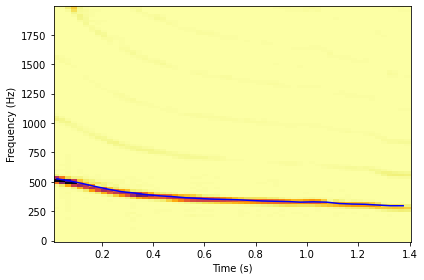

In [23]:
def estimate_fundamental(segment, start=70, end=150):
    lags, correlations = autocorr(segment)
    lag = np.array(correlations[start:end]).argmax() + start
    period = lag / segment.framerate
    return 1 / period

ts = []
frequencies = []

for it in np.arange(0.0, 1.4, 0.05):
    ts.append(it + 0.025)
    segment = wave.segment(start=it, duration=0.01)
    frequency = estimate_fundamental(segment)
    frequencies.append(frequency)

wave.make_spectrogram(2048).plot(high=2000)
pyplot.plot(ts, frequencies, color='blue')
decorate(
    xlabel='Time (s)',
    ylabel='Frequency (Hz)'
)

# Exercise 2

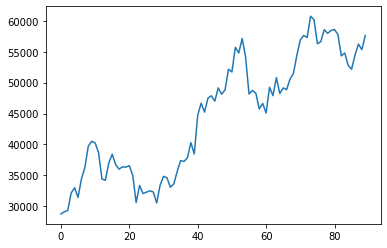

In [26]:
data = pd.read_csv('Data/BTC_USD_2020-12-31_2021-03-30-CoinDesk.csv')
wave = Wave(data['Closing Price (USD)'], data.index, framerate=1)
wave.plot()

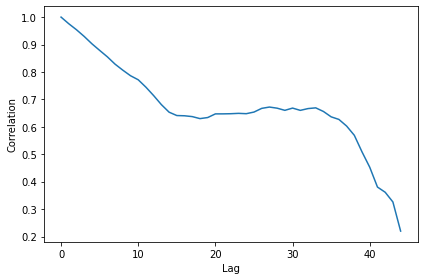

In [28]:
lags, correlations = autocorr(wave)
pyplot.plot(lags, correlations)
decorate(
    xlabel='Lag',
    ylabel='Correlation'
)

# Exercise 4

In [100]:
from thinkdsp import Noise

class MyUncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = numpy.random.poisson(self.amp, len(ts))
        return ys
    
signal = MyUncorrelatedPoissonNoise(amp=0.001)
wave = signal.make_wave(duration=10, framerate=10_000)
wave.make_audio()

In [101]:
sum(wave.ys), 0.001 * 10_000 * 10

(108, 100.0)

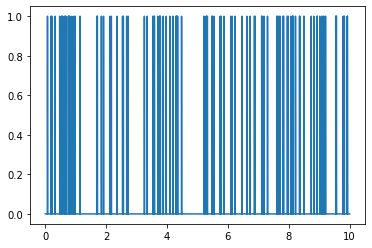

In [102]:
wave.plot()

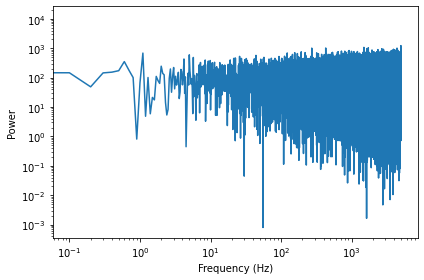

In [103]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [104]:
spectrum.estimate_slope().slope

0.003588744475416015

# Exercise 5

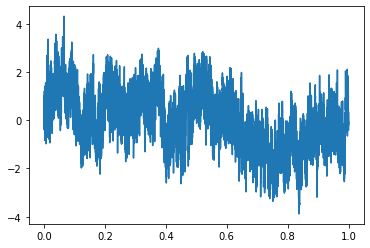

In [113]:
def voss(rows, columns=16):
    array = numpy.empty((rows, columns))
    array.fill(numpy.nan)
    
    array[0, :] = numpy.random.random(columns)
    array[:, 0] = numpy.random.random(rows)
    
    target_columns = numpy.random.geometric(0.5, rows)
    target_columns[target_columns >= columns] = 0
    
    target_rows = numpy.random.randint(rows, size=rows)
    
    array[target_rows, target_columns] = numpy.random.random(rows)

    dataframe = pandas.DataFrame(array)
    dataframe.fillna(method='ffill', axis=0, inplace=True)
    
    total = dataframe.sum(axis=1)
    return total.values

wave = Wave(voss(11025))
wave.unbias()
wave.plot()
wave.make_audio()

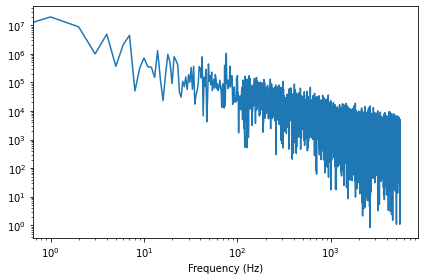

In [115]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         **loglog)

In [116]:
spectrum.estimate_slope().slope

-1.0086281113773163